In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df=df.drop_duplicates()

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [13]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df1=df[['age','sex','cp']]
df2=df[['chol','slp','caa']]
df3=df1.merge(right=df2,how='cross')
df3

,age,sex,cp,chol,slp,caa
0,63,1,3,233,0,0
1,63,1,3,250,0,0
2,63,1,3,204,2,0
3,63,1,3,236,2,0
4,63,1,3,354,2,0
...,...,...,...,...,...,...
91199,57,0,1,241,1,0
91200,57,0,1,264,1,0
91201,57,0,1,193,1,2
91202,57,0,1,131,1,1


In [17]:
df.fbs.unique()

array([1, 0], dtype=int64)

In [19]:
def remove_outliers(column):
    Q1=column.quantile(0.25)
    Q3=column.quantile(0.75)
    IQR=Q3-Q1
    threshold=1.5*IQR
    outlier_mask=(column<Q1 - threshold)|(column>Q3 + threshold)
    return column[~outlier_mask]

In [21]:
col_name=['age','sex','cp','chol','cp']
for col in col_name:
    df[col]=remove_outliers(df[col])

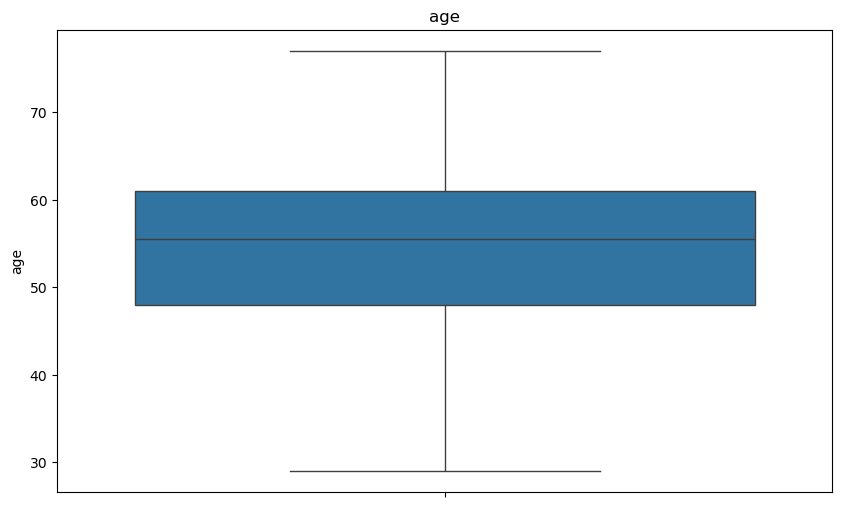

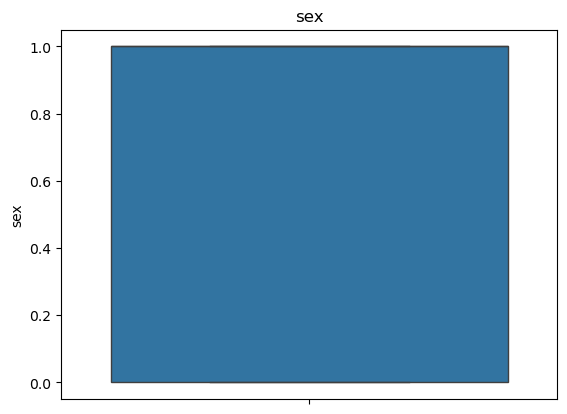

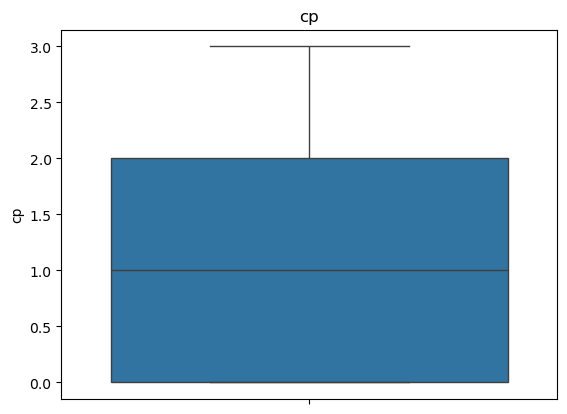

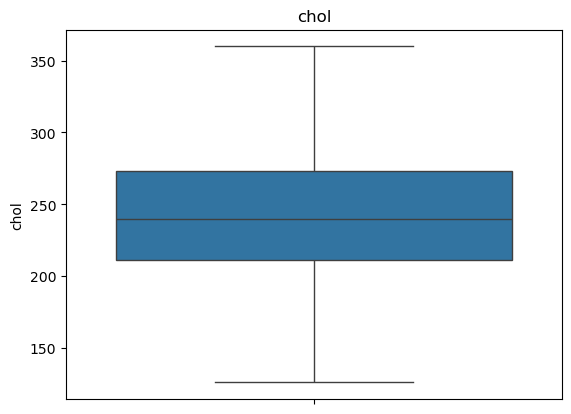

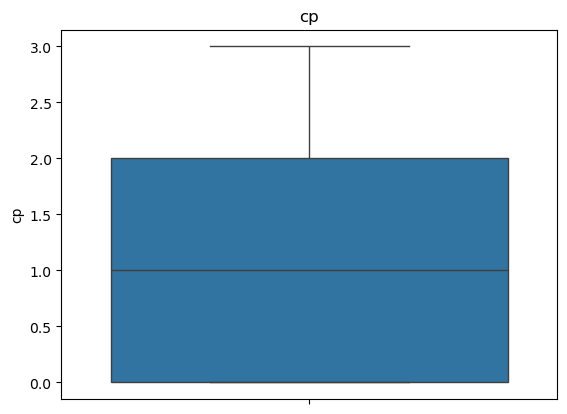

In [23]:
plt.figure(figsize=(10,6))
for col in col_name:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

correlation for term
age        -0.221476
sex        -0.283609
cp          0.432080
trtbps     -0.146269
chol       -0.112667
fbs        -0.026826
restecg     0.134874
thalachh    0.419955
exng       -0.435601
oldpeak    -0.429146
slp         0.343940
caa        -0.408992
thall      -0.343101
Name: output, dtype: float64



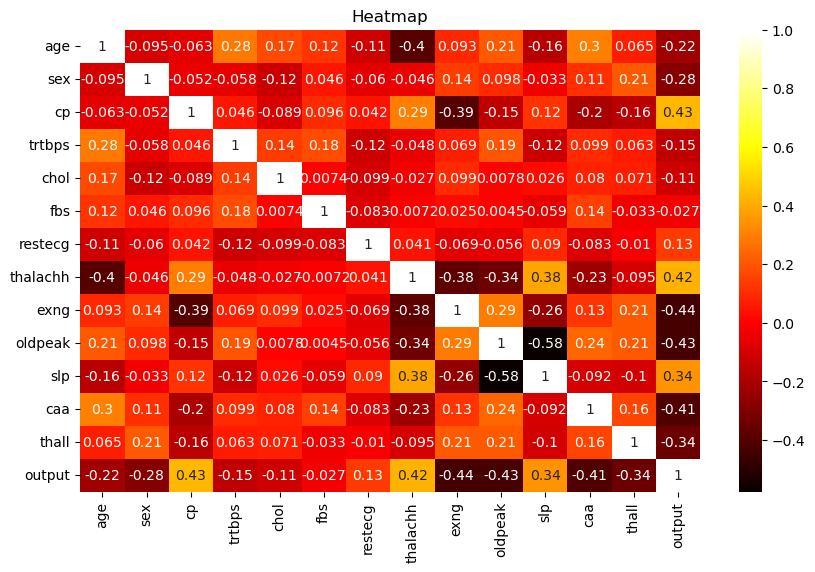

In [25]:
correlation=df.corr()['output'].drop('output')
print("correlation for term")
print(correlation)
print()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, cmap='hot')
plt.title("Heatmap")
plt.show()

In [27]:
df=df.dropna()


In [29]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [31]:
df=df.drop('fbs',axis=1)


In [33]:
x=df[['age','sex','chol','caa']]
y=df.output
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((237, 4), (60, 4), (237,), (60,))

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [37]:
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [39]:
l=LogisticRegression()
l.fit(x_train,y_train)

C:\Users\Swapnil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
y_pred=l.predict(x_test)

In [51]:
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)

In [53]:
print("Accuray is:",accuracy)
print("confusion is :", confusion)

Accuray is: 0.7166666666666667
confusion is : [[15  9]
 [ 8 28]]
